In [130]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

## Data Mining Project

### Data Exploration

In [131]:
# read data
file = 'game_teams_stats.csv'

#read CSV into df
data = pd.read_csv(file)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52610 entries, 0 to 52609
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 52610 non-null  int64  
 1   team_id                 52610 non-null  int64  
 2   HoA                     52610 non-null  object 
 3   won                     52610 non-null  bool   
 4   settled_in              52610 non-null  object 
 5   head_coach              52582 non-null  object 
 6   goals                   52602 non-null  float64
 7   shots                   52602 non-null  float64
 8   hits                    47682 non-null  float64
 9   pim                     52602 non-null  float64
 10  powerPlayOpportunities  52602 non-null  float64
 11  powerPlayGoals          52602 non-null  float64
 12  faceOffWinPercentage    30462 non-null  float64
 13  giveaways               47682 non-null  float64
 14  takeaways               47682 non-null

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,2016020045,4,away,False,REG,Dave Hakstol,4.0,27.0,30.0,6.0,4.0,2.0,50.9,12.0,9.0,11.0,left
1,2016020045,16,home,True,REG,Joel Quenneville,7.0,28.0,20.0,8.0,3.0,2.0,49.1,16.0,8.0,9.0,left
2,2017020812,24,away,True,OT,Randy Carlyle,4.0,34.0,16.0,6.0,3.0,1.0,43.8,7.0,4.0,14.0,right
3,2017020812,7,home,False,OT,Phil Housley,3.0,33.0,17.0,8.0,2.0,1.0,56.2,5.0,6.0,14.0,right
4,2015020314,21,away,True,REG,Patrick Roy,4.0,29.0,17.0,9.0,3.0,1.0,45.7,13.0,5.0,20.0,left


#### Preprocessing

##### Explanation of all stats:

| Nr  | Stat  | Explanation  |
|---|---|---|
| 1  | game_id  |   |
| 2  | team_id  |   |
|  3 | HoA  | Home or Away  |
| 4  |  won |  True/False  |
| 5  |  settled_in | game ended in regulation or overtime (REG/OT)  |
| 6  | head_coach  | name of head coach  |
|  7 | goals  |  goals scored by team |
| 8  | shots   | shots on goal  |
| 9  | hits  | hits (tackles) by team  |
| 10  | pim  |  Penalties In Minutes (a regular penalty is 2 minutes) |
| 11  | powerPlayOpportunities  | opportunities where the other team has a penalty (eg 5v4, 5v3 or 4v3 advantage)  |
|  12 | powerPlayGoals  | goals scored in powerplay  |
|  13 |  powerPlayPercentage | PPG / PPO  |
|  14 | faceOffWinPercentage  | percentage of faceoffs won  |
| 15  | giveaways  |  puck possessions lost to other team |
| 16  | takeaways  | puck possessions won from other team  |
| 17  |  blocked | blocked shots by skaters (not goalie)  |
| 18  | startRinkSide  |  Left/Right |


In [132]:
#data = data.dropna()    #dropping rows with NA-values reduced entries from 52610 to 29554

#create a column for pp%
data['powerPlayPercentage'] = (data['powerPlayGoals'] / data['powerPlayOpportunities'])

#reorder columns
column_order = ['game_id', 'team_id', 'HoA', 'won', 'settled_in', 'head_coach', 'goals', 'shots', 'hits', 'pim', 'powerPlayOpportunities', 'powerPlayGoals', 'powerPlayPercentage', 'faceOffWinPercentage', 'giveaways', 'takeaways', 'blocked', 'startRinkSide']
data = data[column_order]
data = data.groupby('game_id').filter(lambda x: len(x) == 2)
data.info()



#make an aleternative df where numerical values are normalized to [0, 1]
scaler = MinMaxScaler()
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data_norm = data.copy()
data_norm[num_cols] = scaler.fit_transform(data[num_cols])
data_norm.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42330 entries, 0 to 46669
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   game_id                 42330 non-null  int64  
 1   team_id                 42330 non-null  int64  
 2   HoA                     42330 non-null  object 
 3   won                     42330 non-null  bool   
 4   settled_in              42330 non-null  object 
 5   head_coach              42302 non-null  object 
 6   goals                   42322 non-null  float64
 7   shots                   42322 non-null  float64
 8   hits                    37402 non-null  float64
 9   pim                     42322 non-null  float64
 10  powerPlayOpportunities  42322 non-null  float64
 11  powerPlayGoals          42322 non-null  float64
 12  powerPlayPercentage     41806 non-null  float64
 13  faceOffWinPercentage    20182 non-null  float64
 14  giveaways               37402 non-null

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,powerPlayPercentage,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide
0,0.841661,0.056604,away,False,REG,Dave Hakstol,0.333333,0.421875,0.3750,0.028169,0.2500,0.285714,0.500000,0.642677,0.230769,0.225,0.255814,left
1,0.841661,0.283019,home,True,REG,Joel Quenneville,0.583333,0.437500,0.2500,0.037559,0.1875,0.285714,0.666667,0.619949,0.307692,0.200,0.209302,left
2,0.894305,0.433962,away,True,OT,Randy Carlyle,0.333333,0.531250,0.2000,0.028169,0.1875,0.142857,0.333333,0.553030,0.134615,0.100,0.325581,right
3,0.894305,0.113208,home,False,OT,Phil Housley,0.250000,0.515625,0.2125,0.037559,0.1250,0.142857,0.500000,0.709596,0.096154,0.150,0.325581,right
4,0.789071,0.377358,away,True,REG,Patrick Roy,0.333333,0.453125,0.2125,0.042254,0.1875,0.142857,0.333333,0.577020,0.250000,0.125,0.465116,left


In [134]:
home_team_df = data[data['HoA'] == 'home'].set_index('game_id')
away_team_df = data[data['HoA'] == 'away'].set_index('game_id')

# Merge the two DataFrames based on 'game_id'
combined_df = home_team_df.merge(away_team_df, on='game_id', suffixes=('_home', '_away'))

# Reset the index to have 'game_id' as a column
combined_df.reset_index(inplace=True)
combined_df = combined_df.reindex(sorted(combined_df.columns), axis=1)
new_order = ['game_id'] + [col for col in combined_df.columns if col != 'game_id']
combined_df = combined_df[new_order]
combined_df = combined_df.drop(['faceOffWinPercentage_away', 'faceOffWinPercentage_home', 'HoA_away', 'HoA_home', 'head_coach_away', 'head_coach_home', 'settled_in_away', 'startRinkSide_away', 'startRinkSide_home'], axis=1)
combined_df.rename(columns={'settled_in_home': 'settled_in'}, inplace=True)

print(combined_df.iloc[5])
combined_df.info()
combined_df.head()


game_id                        2016020610
blocked_away                         24.0
blocked_home                         18.0
giveaways_away                        8.0
giveaways_home                       12.0
goals_away                            4.0
goals_home                            1.0
hits_away                            19.0
hits_home                            27.0
pim_away                              8.0
pim_home                              4.0
powerPlayGoals_away                   1.0
powerPlayGoals_home                   1.0
powerPlayOpportunities_away           2.0
powerPlayOpportunities_home           4.0
powerPlayPercentage_away              0.5
powerPlayPercentage_home             0.25
settled_in                            REG
shots_away                           39.0
shots_home                           23.0
takeaways_away                        5.0
takeaways_home                        7.0
team_id_away                           15
team_id_home                      

,game_id,blocked_away,blocked_home,giveaways_away,giveaways_home,goals_away,goals_home,hits_away,hits_home,pim_away,...,powerPlayPercentage_home,settled_in,shots_away,shots_home,takeaways_away,takeaways_home,team_id_away,team_id_home,won_away,won_home
0,2016020045,11.0,9.0,12.0,16.0,4.0,7.0,30.0,20.0,6.0,...,0.666667,REG,27.0,28.0,9.0,8.0,4,16,False,True
1,2017020812,14.0,14.0,7.0,5.0,4.0,3.0,16.0,17.0,6.0,...,0.500000,OT,34.0,33.0,4.0,6.0,24,7,True,False
2,2015020314,20.0,9.0,13.0,13.0,4.0,1.0,17.0,22.0,9.0,...,0.000000,REG,29.0,21.0,5.0,7.0,21,52,True,False
3,2015020849,16.0,13.0,4.0,12.0,1.0,2.0,21.0,16.0,10.0,...,0.400000,REG,21.0,29.0,14.0,11.0,52,12,False,True
4,2017020586,7.0,21.0,10.0,13.0,1.0,2.0,20.0,15.0,19.0,...,0.166667,REG,23.0,41.0,4.0,4.0,20,24,False,True


In [135]:
#make an aleternative df where numerical values are normalized to [0, 1]
scaler = MinMaxScaler()
num_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns
combined_data_norm = combined_df.copy()
combined_data_norm[num_cols] = scaler.fit_transform(combined_df[num_cols])
combined_data_norm.dropna()
combined_data_norm.head()

,game_id,blocked_away,blocked_home,giveaways_away,giveaways_home,goals_away,goals_home,hits_away,hits_home,pim_away,...,powerPlayPercentage_home,settled_in,shots_away,shots_home,takeaways_away,takeaways_home,team_id_away,team_id_home,won_away,won_home
0,0.841661,0.255814,0.225,0.244898,0.307692,0.363636,0.583333,0.3750,0.281690,0.029126,...,0.666667,REG,0.450000,0.437500,0.243243,0.200,0.056604,0.283019,False,True
1,0.894305,0.325581,0.350,0.142857,0.096154,0.363636,0.250000,0.2000,0.239437,0.029126,...,0.500000,OT,0.566667,0.515625,0.108108,0.150,0.433962,0.113208,True,False
2,0.789071,0.465116,0.225,0.265306,0.250000,0.363636,0.083333,0.2125,0.309859,0.043689,...,0.000000,REG,0.483333,0.328125,0.135135,0.175,0.377358,0.962264,True,False
3,0.789099,0.372093,0.325,0.081633,0.230769,0.090909,0.166667,0.2625,0.225352,0.048544,...,0.400000,REG,0.350000,0.453125,0.378378,0.275,0.962264,0.207547,False,True
4,0.894293,0.162791,0.525,0.204082,0.250000,0.090909,0.166667,0.2500,0.211268,0.092233,...,0.166667,REG,0.383333,0.640625,0.108108,0.100,0.358491,0.433962,False,True


In [136]:

combined_df = combined_df.dropna()
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18242 entries, 0 to 21164
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   game_id                      18242 non-null  int64  
 1   blocked_away                 18242 non-null  float64
 2   blocked_home                 18242 non-null  float64
 3   giveaways_away               18242 non-null  float64
 4   giveaways_home               18242 non-null  float64
 5   goals_away                   18242 non-null  float64
 6   goals_home                   18242 non-null  float64
 7   hits_away                    18242 non-null  float64
 8   hits_home                    18242 non-null  float64
 9   pim_away                     18242 non-null  float64
 10  pim_home                     18242 non-null  float64
 11  powerPlayGoals_away          18242 non-null  float64
 12  powerPlayGoals_home          18242 non-null  float64
 13  powerPlayOpportu

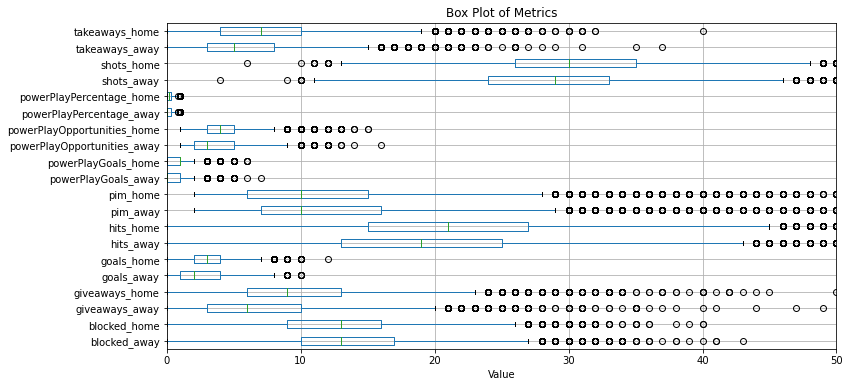

In [137]:
numerical_df = combined_df.select_dtypes(include=['float64', 'int64'])
numerical_df = numerical_df.drop(columns=["game_id"])
numerical_df = numerical_df.drop(columns=["team_id_home"])
numerical_df = numerical_df.drop(columns=["team_id_away"])

# Create a box plot for the numerical columns
plt.figure(figsize=(12, 6))
numerical_df.boxplot(vert=False)
plt.title('Box Plot of Metrics')
plt.xlabel('Value')
plt.xlim(0, 50)
plt.show()

## Feature Selection

In [138]:
# combined_df = pd.get_dummies(combined_df, columns=["settled_in"])

# X_home = combined_df.drop(["won_home", "won_away", "goals_home", "goals_away",  "game_id"], axis=1)
# y_home = combined_df["won_home"]

# X_away = combined_df.drop(["won_away", "won_home", "goals_home", "goals_away",  "game_id"], axis=1)
# y_away = combined_df["won_away"]

In [139]:
# Initialize the classifier
clf_home = RandomForestClassifier()
# Fit the model
clf_home.fit(X_home, y_home)
# Get feature importances
feature_importances_home = clf_home.feature_importances_

In [140]:
clf_away = RandomForestClassifier()
clf_away.fit(X_away, y_away)
feature_importances_away = clf_away.feature_importances_

In [141]:
# Create DataFrames to store feature importances
importance_home_df = pd.DataFrame({'Feature': X_home.columns, 'Importance': feature_importances_home})
importance_away_df = pd.DataFrame({'Feature': X_away.columns, 'Importance': feature_importances_away})

# Sort by importance in descending order
importance_home_df = importance_home_df.sort_values(by='Importance', ascending=False)
importance_away_df = importance_away_df.sort_values(by='Importance', ascending=False)

# Display the top N most important features
N = 22

print("Top", N, "features for 'won_home':")
print(importance_home_df.head(N))
print("\nTop", N, "features for 'won_away':")
print(importance_away_df.head(N))


Top 22 features for 'won_home':
                        Feature  Importance
1                  blocked_home    0.066010
0                  blocked_away    0.065759
5                     hits_home    0.059211
4                     hits_away    0.058998
14                   shots_away    0.056618
15                   shots_home    0.056114
18                 team_id_away    0.054761
19                 team_id_home    0.052714
17               takeaways_home    0.050870
3                giveaways_home    0.049637
13     powerPlayPercentage_home    0.048149
2                giveaways_away    0.046694
16               takeaways_away    0.045897
6                      pim_away    0.045775
12     powerPlayPercentage_away    0.045301
7                      pim_home    0.043954
9           powerPlayGoals_home    0.034282
11  powerPlayOpportunities_home    0.030592
8           powerPlayGoals_away    0.030198
10  powerPlayOpportunities_away    0.029913
20                settled_in_OT    0.015411


In [144]:
# Assuming you already have the DataFrame 'df' and it includes the columns 'home_win' and 'away_win'
# Extract the features and target variables
features = combined_df[["goals_home", "goals_away"]]
target_home = combined_df["won_home"]
target_away = combined_df["won_away"]

# Split the data into training and testing sets
X_train_home, X_test_home, y_train_home, y_test_home = train_test_split(features, target_home, test_size=0.2, random_state=42)
X_train_away, X_test_away, y_train_away, y_test_away = train_test_split(features, target_away, test_size=0.2, random_state=42)

# Create and train the logistic regression models
classifier_home = LogisticRegression()
classifier_home.fit(X_train_home, y_train_home)

classifier_away = LogisticRegression()
classifier_away.fit(X_train_away, y_train_away)

# Make predictions
y_pred_home = classifier_home.predict(X_test_home)
y_pred_away = classifier_away.predict(X_test_away)

# Evaluate the models
print("Classification Report for home_win:")
print(classification_report(y_test_home, y_pred_home))
print("Accuracy Score for home_win:", accuracy_score(y_test_home, y_pred_home))

print("\nClassification Report for away_win:")
print(classification_report(y_test_away, y_pred_away))
print("Accuracy Score for away_win:", accuracy_score(y_test_away, y_pred_away))


Classification Report for home_win:
              precision    recall  f1-score   support

       False       0.90      1.00      0.95      1627
        True       1.00      0.91      0.95      2022

    accuracy                           0.95      3649
   macro avg       0.95      0.96      0.95      3649
weighted avg       0.96      0.95      0.95      3649

Accuracy Score for home_win: 0.9506714168265278

Classification Report for away_win:
              precision    recall  f1-score   support

       False       0.92      1.00      0.96      2090
        True       1.00      0.89      0.94      1559

    accuracy                           0.95      3649
   macro avg       0.96      0.94      0.95      3649
weighted avg       0.95      0.95      0.95      3649

Accuracy Score for away_win: 0.9509454645108248
